In [3]:
import tensorflow as tf 
from numpy import array
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras import datasets

In [18]:
(train_data,train_label),(test_data,test_label)=datasets.mnist.load_data()

#### `Reshape because we feed the imput in 1D to multiperceptron`

In [19]:
train_data=train_data.reshape(60000,784)
test_data=test_data.reshape(10000,784)



In [20]:
model=Sequential()
model.add(Dense(10,input_shape=(784,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary   ()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________


In [21]:
history=model.fit(train_data,train_label,epochs=100,verbose=0,validation_data=(test_data,test_label))


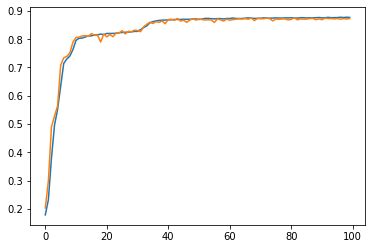

In [22]:
import matplotlib.pyplot as plt 
# model accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


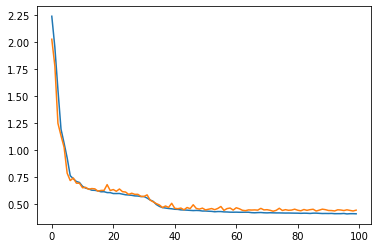

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [33]:
from sklearn.metrics import  confusion_matrix,accuracy_score
import numpy as np
y_pred=model.predict(test_data)
y_pred=[np.argmax(y) for y in y_pred]
print(accuracy_score(y_pred,test_label))

0.8726
